### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
import tensorflow as tf
tf.set_random_seed(42)
import numpy as np

In [56]:
tf.__version__

'1.15.0'

### Collect Data

In [0]:
import keras

In [0]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [59]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
# done after visualization

In [60]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000,)
First 5 examples now are:  [9 0 0 3 0]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

In [0]:
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

y = 9 Ankle boot
y = 0 T-shirt/top
y = 0 T-shirt/top
y = 3 Dress
y = 0 T-shirt/top
y = 2 Pullover
y = 7 Sneaker
y = 2 Pullover
y = 5 Sandal


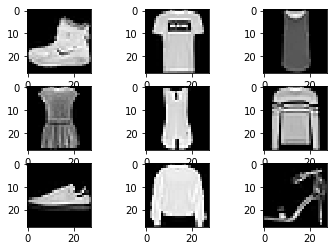

In [66]:
import matplotlib.pyplot as plt
for i in range(9):
    label_index = trainY[i]
    plt.subplot(330 + 1 + i)
    print ("y = " + str(label_index) + " "  + (fashion_mnist_labels[label_index]))
    plt.imshow(trainX[i],cmap='gray')


### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
#model.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

### Execute the model using model.fit()

In [75]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=100,
          batch_size=trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 0s 6us/sample - loss: 221.8861 - acc: 0.1011 - val_loss: 6592.2783 - val_acc: 0.2763
Epoch 2/100
60000/60000 [==============================] - 0s 4us/sample - loss: 6597.0093 - acc: 0.2788 - val_loss: 10709.8848 - val_acc: 0.2575
Epoch 3/100
60000/60000 [==============================] - 0s 4us/sample - loss: 10728.7021 - acc: 0.2583 - val_loss: 14982.7773 - val_acc: 0.1835
Epoch 4/100
60000/60000 [==============================] - 0s 4us/sample - loss: 14968.3633 - acc: 0.1848 - val_loss: 17310.0703 - val_acc: 0.3027
Epoch 5/100
60000/60000 [==============================] - 0s 4us/sample - loss: 17231.1152 - acc: 0.3051 - val_loss: 17529.5078 - val_acc: 0.2381
Epoch 6/100
60000/60000 [==============================] - 0s 4us/sample - loss: 17441.3301 - acc: 0.2378 - val_loss: 16466.3789 - val_acc: 0.2995
Epoch 7/100
60000/60000 [==============================] - 0s 4us/sample

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

### Execute the model

In [77]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=100,
          batch_size=trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 15us/sample - loss: 3.0905 - acc: 0.1022 - val_loss: 20.5801 - val_acc: 0.1639
Epoch 2/100
60000/60000 [==============================] - 1s 11us/sample - loss: 2.7832 - acc: 0.1422 - val_loss: 13.3474 - val_acc: 0.2038
Epoch 3/100
60000/60000 [==============================] - 1s 11us/sample - loss: 2.5349 - acc: 0.1806 - val_loss: 10.2218 - val_acc: 0.2179
Epoch 4/100
60000/60000 [==============================] - 1s 11us/sample - loss: 2.3320 - acc: 0.2217 - val_loss: 8.3411 - val_acc: 0.2275
Epoch 5/100
60000/60000 [==============================] - 1s 11us/sample - loss: 2.1641 - acc: 0.2623 - val_loss: 7.0430 - val_acc: 0.2407
Epoch 6/100
60000/60000 [==============================] - 1s 11us/sample - loss: 2.0238 - acc: 0.3040 - val_loss: 6.0815 - val_acc: 0.2549
Epoch 7/100
60000/60000 [==============================] - 1s 11us/sample - loss: 1.9057 - acc: 0.3438 - va

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [89]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))


# create a new optimizer
opt_ = tf.keras.optimizers.SGD(lr = 0.001)
print(opt_)
#Compile the model
model.compile(optimizer = opt_ , loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [90]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=100,
          batch_size=trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 19us/sample - loss: 2.9343 - acc: 0.1328 - val_loss: 19.4616 - val_acc: 0.1115
Epoch 2/100
60000/60000 [==============================] - 1s 11us/sample - loss: 2.9092 - acc: 0.1357 - val_loss: 13.8171 - val_acc: 0.1138
Epoch 3/100
60000/60000 [==============================] - 1s 11us/sample - loss: 2.8844 - acc: 0.1386 - val_loss: 11.2709 - val_acc: 0.1168
Epoch 4/100
60000/60000 [==============================] - 1s 11us/sample - loss: 2.8600 - acc: 0.1411 - val_loss: 9.7380 - val_acc: 0.1200
Epoch 5/100
60000/60000 [==============================] - 1s 11us/sample - loss: 2.8360 - acc: 0.1439 - val_loss: 8.6847 - val_acc: 0.1230
Epoch 6/100
60000/60000 [==============================] - 1s 11us/sample - loss: 2.8123 - acc: 0.1469 - val_loss: 7.9029 - val_acc: 0.1258
Epoch 7/100
60000/60000 [==============================] - 1s 11us/sample - loss: 2.7889 - acc: 0.1499 - va

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())


In [0]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

In [0]:
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

In [0]:
#Add 3rd Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [95]:
# create a new optimizer
opt_ = tf.keras.optimizers.SGD(lr = 0.03)
print(opt_)

In [0]:
#Compile the model
model.compile(optimizer = opt_ , loss='categorical_crossentropy', 
              metrics=['accuracy'])

## Review model

In [97]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_18 (Reshape)         (None, 784)               0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 784)               3136      
_________________________________________________________________
dense_17 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_18 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1010      
Total params: 92,746
Trainable params: 91,178
Non-trainable params: 1,568
_________________________________________________________________


### Run the model

In [99]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=200,
          batch_size=trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 1s 24us/sample - loss: 1.9823 - acc: 0.5889 - val_loss: 1.9646 - val_acc: 0.5544
Epoch 2/200
60000/60000 [==============================] - 1s 21us/sample - loss: 1.9793 - acc: 0.5901 - val_loss: 1.9616 - val_acc: 0.5559
Epoch 3/200
60000/60000 [==============================] - 1s 21us/sample - loss: 1.9764 - acc: 0.5911 - val_loss: 1.9585 - val_acc: 0.5572
Epoch 4/200
60000/60000 [==============================] - 1s 21us/sample - loss: 1.9734 - acc: 0.5922 - val_loss: 1.9555 - val_acc: 0.5582
Epoch 5/200
60000/60000 [==============================] - 1s 21us/sample - loss: 1.9705 - acc: 0.5931 - val_loss: 1.9524 - val_acc: 0.5598
Epoch 6/200
60000/60000 [==============================] - 1s 21us/sample - loss: 1.9675 - acc: 0.5942 - val_loss: 1.9494 - val_acc: 0.5604
Epoch 7/200
60000/60000 [==============================] - 1s 21us/sample - loss: 1.9646 - acc: 0.5953 - val_l

AS the number epochs are increased the validation accuracy starts doing up. from 100 to 200 leads to an increase in accuracy from 55% to 68%. Also it is not that the most efficient algorithm is the one with the most hidden layers.. we did achieve similar good accuracy in the first simple model as well. Thirdly each time we run the fit ; the accuracy changes due to random initiation of weights used.